In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### P8.1 (1 point)

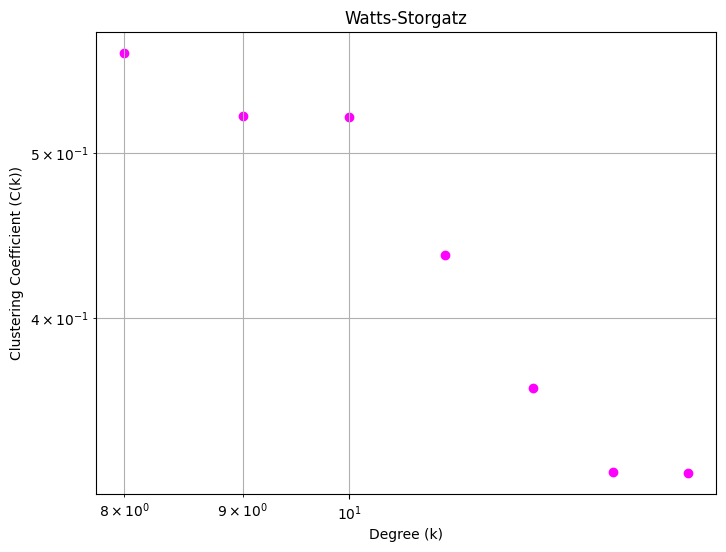

In [9]:
# Watts-Strogatz Network
n_nodes = 1000
k_neighbors = 10
rewiring_prob = 0.1
G = nx.watts_strogatz_graph(n_nodes, k_neighbors, rewiring_prob)

def draw_C_k_plot(G, name):

    degrees = dict(G.degree())
    clustering_coef = nx.clustering(G)

    degree_clustering = {}
    for node, k in degrees.items():
        if k not in degree_clustering:
            degree_clustering[k] = []
        degree_clustering[k].append(clustering_coef[node])

    k_values = sorted(degree_clustering.keys())
    c_k = [np.mean(degree_clustering[k]) for k in k_values]

    plt.figure(figsize=(8, 6))
    plt.scatter(k_values, c_k, color='fuchsia')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Degree (k)')
    plt.ylabel('Clustering Coefficient (C(k))')
    plt.grid(True, which="both", linestyle="-")
    plt.show()


draw_C_k_plot(G, 'Watts-Storgatz')

### P8.2 [0.5 points]

{'ca-GrQc': './graphs/ca-GrQc.mtx', 'road-chesapeake': './graphs/road-chesapeake.mtx', 'bn-cat-mixed-species_brain_1': './graphs/bn-cat-mixed-species_brain_1.edges', 'ca-sandi_auths': './graphs/ca-sandi_auths.mtx', 'inf-USAir97': './graphs/inf-USAir97.mtx'}


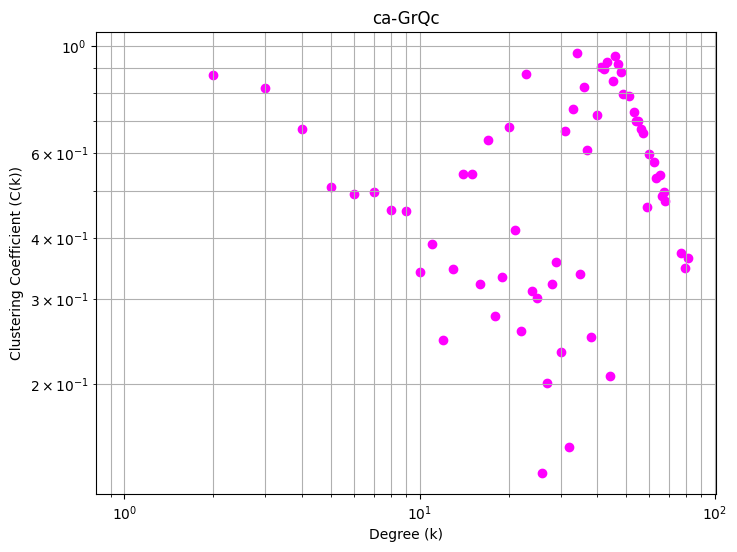

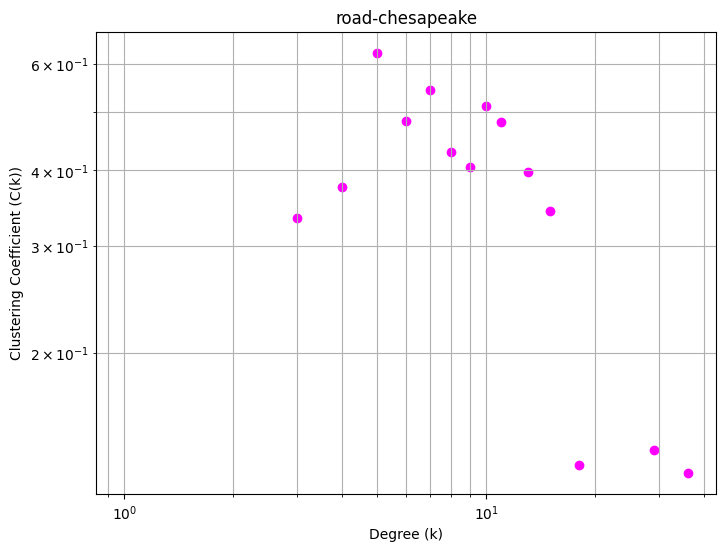

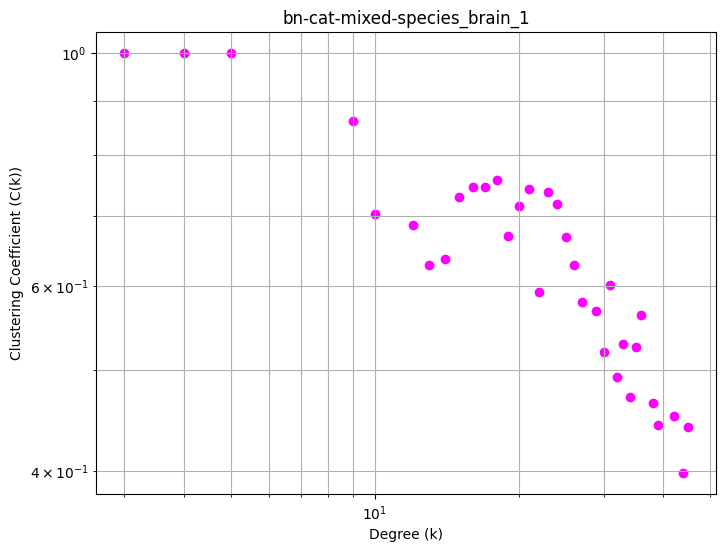

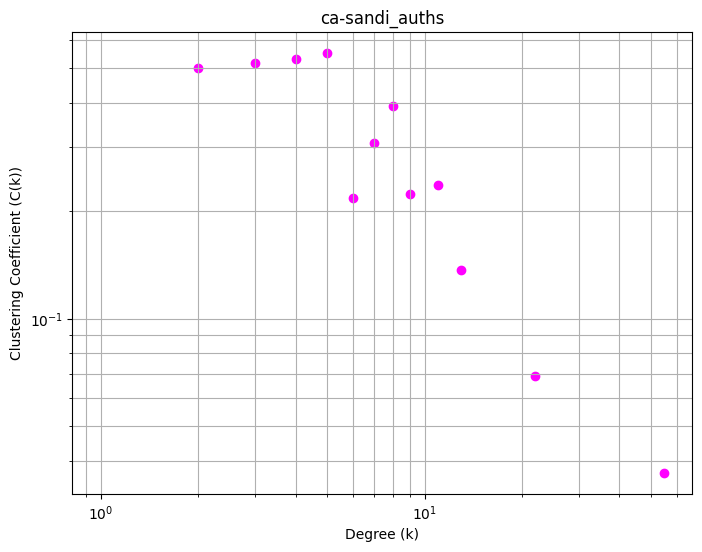

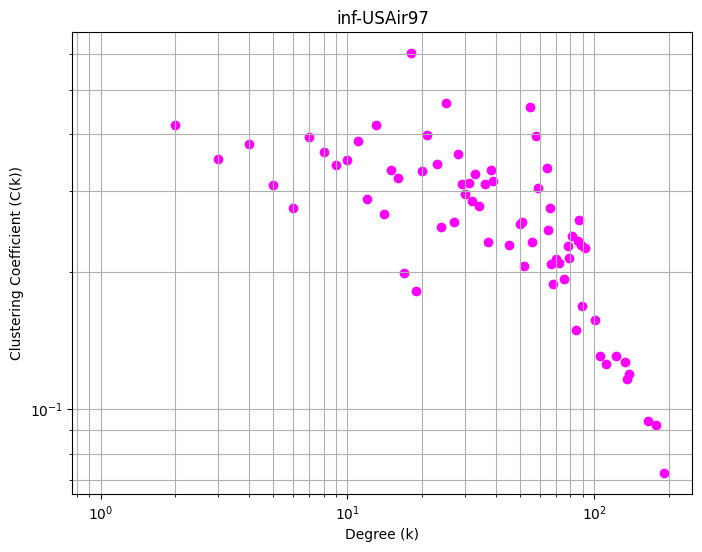

In [11]:
import os

def get_graph(graph_filepath: str):
    G = None
    if graph_filepath.endswith('.mtx'):
        G = nx.read_adjlist(graph_filepath)  
    elif graph_filepath.endswith('.edges'):
        G = nx.read_edgelist(graph_filepath)
    else:
        ValueError("Wrong graph type!")
        
    return G 

directory_path = './graphs/' 
networks = dict()

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    
    if os.path.isfile(file_path):
        networks[filename.split('.')[0]] = file_path

print(networks)


for name, path in networks.items():
    G = get_graph(path)
    draw_C_k_plot(G, name)


Sandi auths present mostly as a hierarchical network - is it and autorship network, so it makes sense, (ca-sandi_auths can have senior researchers working more with less-experienced ones)